In [1]:
import json
import requests
import pandas as pd
from config import gkey
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#read in file with zip code data for Chicago
file = "Zip_Codes.csv"
zip_codes = pd.read_csv(file)
zip_codes.head()


,OBJECTID,ZIP,SHAPE_AREA,SHAPE_LEN
0,33,60647,"106,052,287.49","42,720.04"
1,34,60639,"127,476,050.76","48,103.78"
2,35,60707,"45,069,038.48","27,288.61"
3,36,60622,"70,853,834.38","42,527.99"
4,37,60651,"99,039,621.25","47,970.14"


In [3]:
zipcode = zip_codes['ZIP']


In [4]:
#find number of bars per zip code
url = "https://data.cityofchicago.org/resource/x7bm-cj66.json?"

#target
y = 0
for x in zipcode:
    target = url + f"&zip_code={x}" + "&$limit=5000"
    response = requests.get(target).json()
    bars = len(response)
    zip_codes.loc[y, 'Number_of_bars'] = bars
    y = y + 1
    print(f"The number of bars in zip code {x} is {bars}")



The number of bars in zip code 60647 is 1151
The number of bars in zip code 60639 is 299
The number of bars in zip code 60707 is 98
The number of bars in zip code 60622 is 1131
The number of bars in zip code 60651 is 36
The number of bars in zip code 60611 is 1853
The number of bars in zip code 60638 is 302
The number of bars in zip code 60652 is 85
The number of bars in zip code 60626 is 329
The number of bars in zip code 60615 is 222
The number of bars in zip code 60621 is 40
The number of bars in zip code 60645 is 63
The number of bars in zip code 60643 is 129
The number of bars in zip code 60660 is 234
The number of bars in zip code 60628 is 68
The number of bars in zip code 60625 is 454
The number of bars in zip code 60641 is 286
The number of bars in zip code 60657 is 1518
The number of bars in zip code 60636 is 28
The number of bars in zip code 60633 is 53
The number of bars in zip code 60643 is 129
The number of bars in zip code 60612 is 200
The number of bars in zip code 60604

In [5]:
zip_codes.head()

,OBJECTID,ZIP,SHAPE_AREA,SHAPE_LEN,Number_of_bars
0,33,60647,"106,052,287.49","42,720.04",1151.0
1,34,60639,"127,476,050.76","48,103.78",299.0
2,35,60707,"45,069,038.48","27,288.61",98.0
3,36,60622,"70,853,834.38","42,527.99",1131.0
4,37,60651,"99,039,621.25","47,970.14",36.0


In [6]:
#clean up dataframe
zip_codes = zip_codes.drop(columns=['OBJECTID', 'SHAPE_AREA', 'SHAPE_LEN'])
zip_codes.head()

,ZIP,Number_of_bars
0,60647,1151.0
1,60639,299.0
2,60707,98.0
3,60622,1131.0
4,60651,36.0


In [7]:
zip_codes.to_csv('ZIP_vs_Bar_Chicago.csv')

In [28]:
#find covid data for same zip codes
covid_url = "https://data.cityofchicago.org/resource/yhhz-zm2v.json?"
y = 0
u = 0
for x in zipcode:
    try:
        target = covid_url + f"&zip_code={x}"
        response = requests.get(target).json()
        population = response[0]['population']
        cases = response[0]['cases_cumulative']
        zip_codes.loc[y, 'Population'] = population
        zip_codes.loc[y, 'Cases_cumulative']=cases
        y = y + 1
        print(f"The number of cases in zip code {x} is {cases}")
    except KeyError:
        print(f"Error retrieving data for zip code {x}")
        

The number of cases in zip code 60647 is 2285
The number of cases in zip code 60639 is 4747
The number of cases in zip code 60707 is 583
The number of cases in zip code 60622 is 1179
The number of cases in zip code 60651 is 2545
The number of cases in zip code 60611 is 457
The number of cases in zip code 60638 is 2059
The number of cases in zip code 60652 is 1660
The number of cases in zip code 60626 is 1448
The number of cases in zip code 60615 is 645
The number of cases in zip code 60621 is 768
The number of cases in zip code 60645 is 1446
The number of cases in zip code 60643 is 1204
The number of cases in zip code 60660 is 767
The number of cases in zip code 60628 is 1710
The number of cases in zip code 60625 is 2202
The number of cases in zip code 60641 is 2499
The number of cases in zip code 60657 is 982
The number of cases in zip code 60636 is 1096
The number of cases in zip code 60633 is 349
The number of cases in zip code 60643 is 1204
The number of cases in zip code 60612 is 

In [29]:
zip_codes.head(10)

,ZIP,Number_of_bars,Population,Cases_cumulative
0,60647.0,1151.0,87509,2285
1,60639.0,299.0,90517,4747
2,60707.0,98.0,43019,583
3,60622.0,1131.0,52793,1179
4,60651.0,36.0,63218,2545
5,60611.0,1853.0,32426,457
6,60638.0,302.0,58797,2059
7,60652.0,85.0,43907,1660
8,60626.0,329.0,49730,1448
9,60615.0,222.0,41563,645


In [31]:
#clean up dataframe, calculate bars and covid per capita
zip_codes = zip_codes.dropna()
zip_codes['Number_of_bars'] = zip_codes['Number_of_bars'].astype(float)
zip_codes['Cases_cumulative'] = zip_codes['Cases_cumulative'].astype(float)
zip_codes['Population'] = zip_codes['Population'].astype(float)
zip_codes['Cases_per_population'] = (zip_codes['Cases_cumulative']/zip_codes['Population'])
zip_codes['Bars_per_population'] = (zip_codes['Number_of_bars']/zip_codes['Population'])
zip_codes.head()

,ZIP,Number_of_bars,Population,Cases_cumulative,Cases_per_population,Bars_per_population
0,60647.0,1151.0,87509.0,2285.0,0.026112,0.013153
1,60639.0,299.0,90517.0,4747.0,0.052443,0.003303
2,60707.0,98.0,43019.0,583.0,0.013552,0.002278
3,60622.0,1131.0,52793.0,1179.0,0.022333,0.021423
4,60651.0,36.0,63218.0,2545.0,0.040258,0.000569


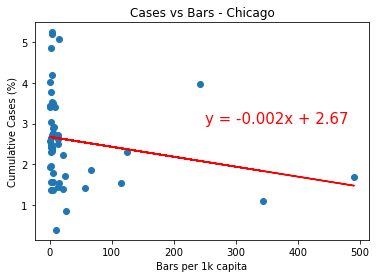

The r value is -0.19
The p value is 0.17


In [32]:
#plot the data, bars on x, covid on y
cases = zip_codes['Cases_per_population']*100
bars = zip_codes['Bars_per_population']*1000

(slope, intercept, rvalue, pvalue, stderr) = linregress(bars, cases)
regress_values = bars * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(bars, cases)
plt.plot(bars,regress_values,"r-")
plt.annotate(line_eq,(250,3),fontsize=15,color="red")
plt.xlabel('Bars per 1k capita')
plt.ylabel('Cumulative Cases (%)')
plt.title('Cases vs Bars - Chicago')
#plt.xlim(0, 0.03)
plt.savefig('Cases_vs_bars_Chicago_full')
plt.show()
print(f"The r value is {round(rvalue,2)}")
print(f"The p value is {round(pvalue, 2)}")

In [69]:
zip_codes.to_csv('ZIP_vs_Bar_vs_Cases_Chicago.csv')

In [70]:
#find bar outliers
quartiles = zip_codes['Bars_per_population'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

zip_codes_adj = zip_codes.loc[(zip_codes['Bars_per_population'] < upper_bound) & (zip_codes['Bars_per_population'] > lower_bound)]
print(len(zip_codes))
print(len(zip_codes_adj))

51
44


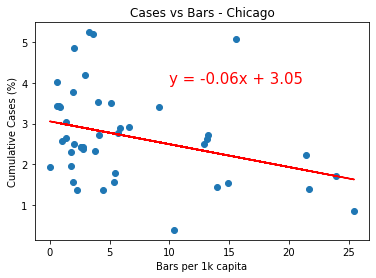

The r value is -0.34
The p value is 0.02


In [35]:
#plot with outliers removed
bars_adj = zip_codes_adj['Bars_per_population']*1000
cases_adj = zip_codes_adj['Cases_per_population']*100

(slope, intercept, rvalue, pvalue, stderr) = linregress(bars_adj, cases_adj)
regress_values = bars_adj * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(bars_adj, cases_adj)
plt.plot(bars_adj,regress_values,"r-")
plt.annotate(line_eq,(10,4),fontsize=15,color="red")
plt.xlabel('Bars per 1k capita')
plt.ylabel('Cumulative Cases (%)')
plt.title('Cases vs Bars - Chicago')
#plt.xlim(0,4)
plt.savefig('Cases_vs_bars_Chicago_adj')
plt.show()
print(f"The r value is {round(rvalue,2)}")
print(f"The p value is {round(pvalue, 2)}")

In [38]:
#find high bar low covid zip code
zipcode_low = zip_codes.loc[(zip_codes['Bars_per_population']>0.023) & (zip_codes['Bars_per_population']<0.025)]
zip_low_covid=zipcode_low['ZIP']
zip_low_covid

43    60613.0
Name: ZIP, dtype: float64

In [58]:
#pull covid data for low covid zip code
covid_url = "https://data.cityofchicago.org/resource/yhhz-zm2v.json?"
target = covid_url + f"&zip_code=60613"
response = requests.get(target).json()
pprint(response)

[{'case_rate_cumulative': '1564.5',
  'case_rate_weekly': '63.9',
  'cases_cumulative': '784',
  'cases_weekly': '32',
  'death_rate_cumulative': '61.9',
  'death_rate_weekly': '0',
  'deaths_cumulative': '31',
  'deaths_weekly': '0',
  'percent_tested_positive_cumulative': '0.061',
  'percent_tested_positive_weekly': '0.056',
  'population': '50113',
  'row_id': '60613-39',
  'test_rate_cumulative': '25787.7',
  'test_rate_weekly': '1141.4',
  'tests_cumulative': '12923',
  'tests_weekly': '572',
  'week_end': '2020-09-26T00:00:00.000',
  'week_number': '39',
  'week_start': '2020-09-20T00:00:00.000',
  'zip_code': '60613',
  'zip_code_location': {'coordinates': [-87.661343, 41.953742],
                        'type': 'Point'}},
 {'case_rate_cumulative': '1500.6',
  'case_rate_weekly': '87.8',
  'cases_cumulative': '752',
  'cases_weekly': '44',
  'death_rate_cumulative': '61.9',
  'death_rate_weekly': '0',
  'deaths_cumulative': '31',
  'deaths_weekly': '0',
  'percent_tested_positiv

In [59]:
#set up dataframe for a low covid zipcode
timeline_low = pd.DataFrame()
timeline_low['Week']=[]
timeline_low['case_rate_weekly']=[]

In [60]:
#pull weekly covid data
for x in range(len(response)):
    try:
        week = response[x]['week_number']
        case_rate = response[x]['case_rate_weekly']
        timeline_low.loc[x,'Week']= week
        timeline_low.loc[x,'case_rate_weekly']=case_rate
    except: KeyError
        
timeline_low1 = timeline_low.sort_values(by=['Week'])
timeline_low1

,Week,case_rate_weekly
28,11,10
27,12,49.9
26,13,65.9
25,14,101.8
24,15,63.9
23,16,71.8
22,17,73.8
21,18,129.7
20,19,61.9
19,20,25.9


In [42]:
#find low bar high covid 
zipcode_high = zip_codes.loc[(zip_codes['Cases_per_population']>0.05) & (zip_codes['Bars_per_population']<0.005)]
zip_high_covid=zipcode_high['ZIP']
zip_high_covid

1     60639.0
46    60632.0
Name: ZIP, dtype: float64

In [62]:
#pull high covid zipcode data
covid_url = "https://data.cityofchicago.org/resource/yhhz-zm2v.json?"
target = covid_url + f"&zip_code=60632"
response = requests.get(target).json()
pprint(response)

[{'case_rate_cumulative': '5083.5',
  'case_rate_weekly': '114.2',
  'cases_cumulative': '4628',
  'cases_weekly': '104',
  'death_rate_cumulative': '113.1',
  'death_rate_weekly': '3.3',
  'deaths_cumulative': '103',
  'deaths_weekly': '3',
  'percent_tested_positive_cumulative': '0.238',
  'percent_tested_positive_weekly': '0.15',
  'population': '91039',
  'row_id': '60632-39',
  'test_rate_cumulative': '21372.2',
  'test_rate_weekly': '763.4',
  'tests_cumulative': '19457',
  'tests_weekly': '695',
  'week_end': '2020-09-26T00:00:00.000',
  'week_number': '39',
  'week_start': '2020-09-20T00:00:00.000',
  'zip_code': '60632',
  'zip_code_location': {'coordinates': [-87.711251, 41.810038],
                        'type': 'Point'}},
 {'case_rate_cumulative': '4969.3',
  'case_rate_weekly': '150.5',
  'cases_cumulative': '4524',
  'cases_weekly': '137',
  'death_rate_cumulative': '109.8',
  'death_rate_weekly': '0',
  'deaths_cumulative': '100',
  'deaths_weekly': '0',
  'percent_test

In [63]:
timeline_high = pd.DataFrame()
timeline_high['Week']=[]
timeline_high['case_rate_weekly']=[]

In [64]:
for x in range(len(response)):
    try:
        week = response[x]['week_number']
        case_rate = response[x]['case_rate_weekly']
        timeline_high.loc[x,'Week']= week
        timeline_high.loc[x,'case_rate_weekly']=case_rate
    except: KeyError

In [65]:
timeline_high1 = timeline_high.sort_values(by=['Week'])
timeline_high1

,Week,case_rate_weekly
27,12,4.4
26,13,29.7
25,14,61.5
24,15,125.2
23,16,291.1
22,17,495.4
21,18,647
20,19,519.6
19,20,492.1
18,21,389.9


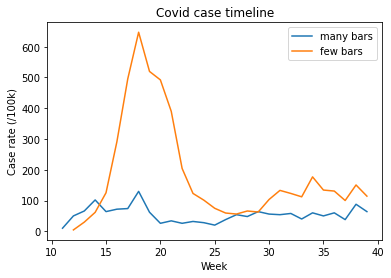

In [68]:
#plot covid time lines
x1 = timeline_low1['Week'].astype(float)
x2 = timeline_high1['Week'].astype(float)
y1 = timeline_low1['case_rate_weekly'].astype(float)
y2 = timeline_high1['case_rate_weekly'].astype(float)
plt.plot(x1,y1,)
plt.plot(x2,y2,)
plt.legend(['many bars', 'few bars'],loc='best')
plt.title('Covid case timeline')
plt.xlabel('Week')
plt.ylabel('Case rate (/100k)')
plt.savefig('Covid_timeline_low_vs_high_bar_density')
plt.show()